In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from tqdm import tqdm
import matplotlib.pyplot as plt

users = pd.read_csv('../../../dataset/userid-profile.tsv', sep='\t', header=0, index_col='#id')

listening_history = pd.read_csv('../../../dataset/userid-timestamp-artid-artname-traid-traname.tsv', sep='\t', encoding='utf8', header=None, error_bad_lines=False)
listening_history.columns = ["#id", "timestamp ", "artist-id", "artist-name", "track-id","track-name"]

b'Skipping line 2120260: expected 6 fields, saw 8\n'
b'Skipping line 2446318: expected 6 fields, saw 8\n'
b'Skipping line 8709941: expected 6 fields, saw 11\nSkipping line 8709958: expected 6 fields, saw 11\nSkipping line 8710163: expected 6 fields, saw 11\n'
b'Skipping line 11141081: expected 6 fields, saw 8\n'
b'Skipping line 11152099: expected 6 fields, saw 12\nSkipping line 11152402: expected 6 fields, saw 8\n'
b'Skipping line 11882087: expected 6 fields, saw 8\n'
b'Skipping line 12902539: expected 6 fields, saw 8\nSkipping line 12935044: expected 6 fields, saw 8\n'
b'Skipping line 17589539: expected 6 fields, saw 8\n'


In [2]:
# get_user_id
users_us = users[users['country']=='United States'].reset_index()

In [3]:
# reset index
listening_history_us = listening_history.set_index('#id').loc[users_us['#id']]
listening_history_us = listening_history_us.reset_index()

In [4]:
#calculate  the distirbution of the users
unique_users = listening_history_us['#id'].unique()
unique_tracks = listening_history_us['track-name'].unique()
print ('Number of unique users : ' + str(len(unique_users)))
print ('Number of unique tracks : ' + str(len(unique_tracks)))
print ('Times of tracks being listened: ' + str(len(listening_history_us)))

Number of unique users : 228
Number of unique tracks : 448129
Times of tracks being listened: 5016564


In [5]:
# remap the users
track_keys = {}

for track in unique_tracks:
    track_keys[track] = len(track_keys)
    
user_keys = {}

for user in unique_users:
    user_keys[user] = len(user_keys)
    
unique_user = len(unique_users)
unique_track = len(unique_tracks)
    

In [6]:
listening_history_us['tid']= listening_history_us['track-name'].map(track_keys)
listening_history_us['uid']= listening_history_us['#id'].map(user_keys)

In [7]:
lh = listening_history_us[['uid','tid']]

In [8]:
lh['count'] = 1

/home/han/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
lh = lh.groupby(["uid", "tid"]).sum().reset_index()
lh[:10]

,uid,tid,count
0,0,0,1
1,0,1,1
2,0,2,1
3,0,3,1
4,0,4,15
5,0,5,3
6,0,6,1
7,0,7,1
8,0,8,10
9,0,9,1


In [ ]:
lh.to_pickle('../data/counting.pkl')

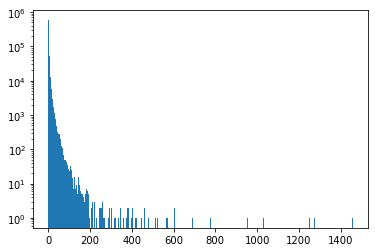

In [10]:
lh_list = lh['count'].values.tolist()
bins = [i for i in range(0,lh['count'].max()+1,1)]
plt.hist(lh_list, bins=bins)
plt.yscale('log')
plt.show()

In [ ]:
max_list = []
for i in lh['uid'].unique():
    user = lh[lh['uid'] == i]
    max_value = max(user['count'])
    max_list.append(max_value)

In [ ]:
counting_list = []
for i in range(0, unique_user):
    counting_list.append(np.zeros(unique_track, dtype=np.int))

In [ ]:
for i in tqdm(range(unique_track)):
    temp = lh[lh['tid'] == i]
    for index, row in temp.iterrows():
        uindex = int(row['uid'])
        counting_list[uindex][i] = row['count']

In [ ]:
np.savetxt("../data/counting_list.csv", counting_list, delimiter=",", fmt='%d')

In [ ]:
#minmax

In [ ]:
normalized_list = []
for i in range(0, unique_user):
    normalized_list.append(np.zeros(unique_track, dtype=np.int))

In [ ]:
for i in tqdm(lh['uid'].unique()):
    user = lh[lh['uid'] == i]
    max_value = max(user['count'])
    normalized_list[i] = [j *5 / max_value for j in counting_list[i]]

In [ ]:
np.savetxt("../data/normalized_list.csv", normalized_list, delimiter=",")

In [ ]:
counting_list

In [ ]:
normalized_list

In [ ]:
normalized_pd = lh.copy()
normalized_pd.rename(columns={'count':'rating'}, inplace=True)
normalized_pd = normalized_pd.astype({'rating': 'float64'})

In [ ]:
for i in tqdm(range(unique_user)):
    temp = lh[lh['uid'] == i]
    for index, row in temp.iterrows():
        normalized_pd['rating'][index] /= max_list[i]
        normalized_pd['rating'][index] *= 5

In [ ]:
normalized_pd.to_pickle('../data/normalized_pd.pkl')